<a href="https://colab.research.google.com/github/AnshuMANNNNNNN/CNN_Network/blob/main/CNN_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food-101 Image Classification in Google Colab — Full Explanation**

In [10]:
# STEP 1: Install TensorFlow Datasets
# !pip install tensorflow-datasets

# **What this step does 1:**

Imports all the necessary and required libraries

In [11]:
# STEP 2: Import Required Libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# **What this step does 2:**

tensorflow: Deep learning framework (we'll use it to build/train our model)

tensorflow_datasets (tfds): To load the Food-101 dataset

matplotlib.pyplot: For image plotting

numpy: For numerical operations and predictions

In [ ]:
#STEP 3: Load the Food-101 Dataset
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=[ 'train', 'validation' ],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.NCIGBS_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.NCIGBS_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


# **What this step does 3:**

- Loads the Food-101 dataset.

- split=['train', 'validation']: Fetches training and test data.

- as_supervised=True: Each sample is (image, label).

- with_info=True: Returns metadata (like label names, shapes, etc.).

In [ ]:
# STEP 4: View Dataset Information
print(f"Total Classes: {ds_info.features['label'].num_classes}")
print(f"Sample Classes: {ds_info.features['label'].names[:10]}")

Total Classes: 101
Sample Classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


# **What** this step does 4:

- ds_info: Metadata about the dataset

- Prints number of food classes and some class names like "pizza", "sushi", etc.

In [ ]:
# STEP 5: Preprocess the Images
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) # Resize to 224x224
  image = tf.cast(image, tf.float32) / 255.0       # Normalize pixels [0,1]
  return image, label

# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# **What this step does 5:**
- Resizes images to 224x224 - standard input size for CNNs like MobileNet.
- Normalizes pixel values (0-255 -> 0-1).
- Batching: Combines samples into groups of 32 for faster training.
- Prefetching: Loads next batch while current is training (for speed).

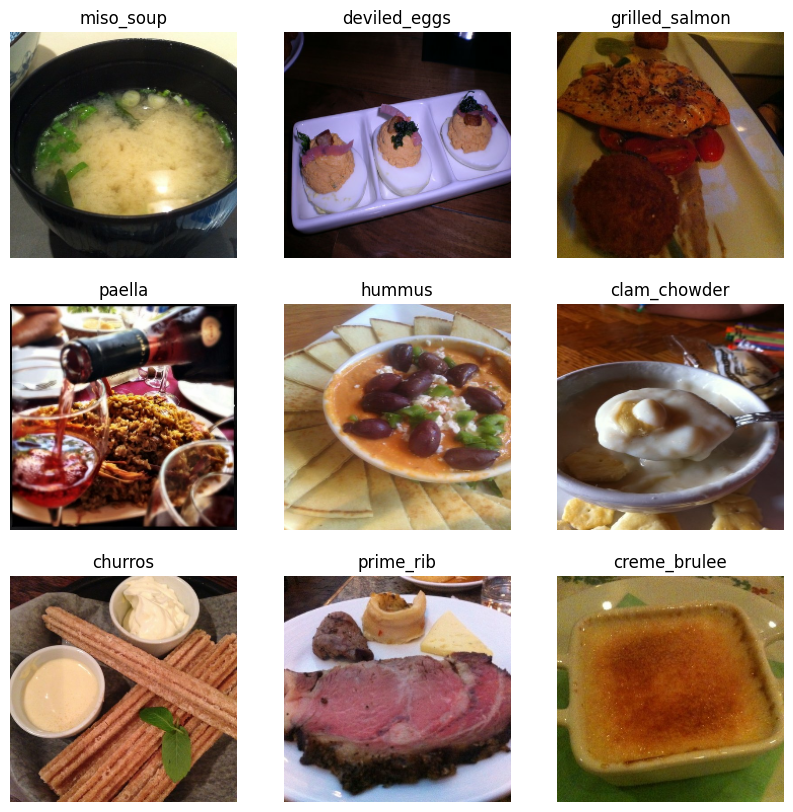

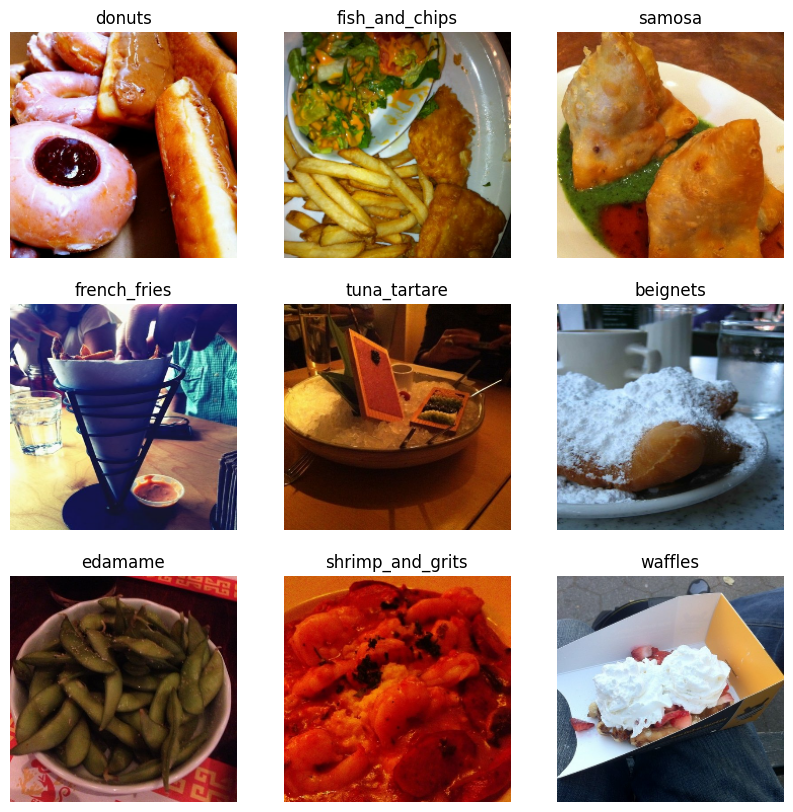

In [ ]:
# STEP 6: Visualize Images
for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    label = ds_info.features['label'].int2str(labels[i].numpy())
    plt.title(label)
    plt.axis("off")
  plt.show()# STEP 6: Visualize Images
for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    label = ds_info.features['label'].int2str(labels[i].numpy())
    plt.title(label)
    plt.axis("off")
  plt.show()

# **In Step 6**

Displays 9 food images from the training set

Converts label integers to readable food names(e.g., "pizza").

In [ ]:
#STEP 7: Build the CNN Model (Transfer Learning)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base layers

model = tf.keras.Sequential ([
    base_model,
    tf.keras. layers.GlobalAveragePooling2D(),             # Flatten feature maps
    tf.keras. layers.Dense(101, activation='softmax' )     # 101 food categories
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **What in step 7:**

Loads MobileNetV2 pretrained on ImageNet (already knows general image features).

Freezes it to use as a feature extractor.

Adds a custom classification layer (Dense(101)) for our 101 food classes.

softmax: Returns probabilities for each class.

In [ ]:
# STEP 8: Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# **What in step 8:**

adam: Efficient optimizer for training.

sparse_categorical_crossentropy:Used for integer-labeled multi-class
classification.

accuracy: Evaluation metric.

In [9]:
#STEP 9: Train the Model
history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3873s 2s/step - accuracy: 0.3815 - loss: 2.6157 - val_accuracy: 0.5669 - val_loss: 1.6649
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3947s 2s/step - accuracy: 0.5778 - loss: 1.6635 - val_accuracy: 0.5872 - val_loss: 1.5796
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3904s 2s/step - accuracy: 0.6189 - loss: 1.4800 - val_accuracy: 0.5979 - val_loss: 1.5567
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3879s 2s/step - accuracy: 0.6428 - loss: 1.3687 - val_accuracy: 0.5922 - val_loss: 1.5949
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3899s 2s/step - accuracy: 0.6592 - loss: 1.2946 - val_accuracy: 0.5881 - val_loss: 1.6209


# **What in step 9:**

Trains the model for 5 epochs(5 passes over training data).

Validates performance on the test set after each epoch.

In [12]:
#STEP 10: Evaluate the Model
loss, accuracy = model.evaluate(ds_test)
print (f"Test Accuracy: {accuracy * 100 : .2f}%")

790/790 ━━━━━━━━━━━━━━━━━━━━ 971s 1s/step - accuracy: 0.5900 - loss: 1.6237
Test Accuracy:  58.81%


# **What in step 10:**

Tests final model on unseen data.
Prints accuracy-how well it classifies real food images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


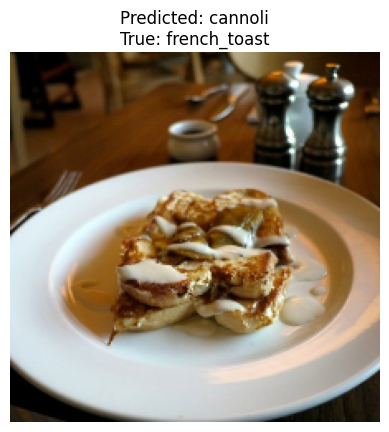

In [13]:
#STEP 11: Make Predictions & Show Results
class_names = ds_info. features[ 'label' ].names

for images, labels in ds_test.take(1):
  image = images[0]
  true_label = class_names[labels[0].numpy( )]

  prediction = model.predict(tf.expand_dims(image, axis=0))
  predicted_label = class_names[np.argmax(prediction)]

  plt.imshow(image)
  plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
  plt.axis('off')
  plt.show()

# **What in step 11:**

Selects 11 image from test data.

Predicts its label using the model.

Displays the image with its true and predicted labels.

In [14]:
#STEP12: Save the Trained Model (Optional)
model.save("food101_model.h5")     # Save to file
#Saves the trained model in .h5 format so you can reuse it later.

Step	Code Block Purpose

1	Install Datasets

2	Import Libraries

3	Load Food-101

4	View Class Info

5	Preprocess Images

6	Visualize Samples

7	Build CNN Model

8	Compile Model

9	Train Model

10	Evaluate Model

11	Predict & Visualize

12	Save the Model